<a href="https://colab.research.google.com/github/VU-CSP/QuantBio/blob/gh-pages/static_files/presentations/05_ThunorColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.12.2


In [2]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !pip install thunor

In [3]:
import os, sys
import thunor

## Load a file
First, specify a file to load. Here, we use an example dataset from the thunor package itself.

In [4]:
if not os.path.exists('./hts007.h5'):
    !wget https://github.com/alubbock/thunor/raw/master/thunor/testdata/hts007.h5

hts007_file = 'hts007.h5'

--2024-03-19 12:57:16--  https://github.com/alubbock/thunor/raw/master/thunor/testdata/hts007.h5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alubbock/thunor/master/thunor/testdata/hts007.h5 [following]
--2024-03-19 12:57:16--  https://raw.githubusercontent.com/alubbock/thunor/master/thunor/testdata/hts007.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1402890 (1.3M) [application/octet-stream]
Saving to: ‘hts007.h5’

hts007.h5           100%[===================>]   1.34M  --.-KB/s    in 0.06s   

2024-03-19 12:57:16 (20.9 MB/s) - ‘hts007.h5’ saved [1402890/1402890]



Load the file using `read_hdf` (for HDF5 files), `read_vanderbilt_hts` (for CSV files), or another appropriate reader.

In [5]:
from thunor.io import read_hdf
hts007 = read_hdf(hts007_file)

Show a summary of the data.

In [6]:
hts007

HTS Dataset (27 drugs/combos, 8 cell lines)

We'll just use a subset of the drugs, to make the plots manageable.

In [7]:
hts007r = hts007.filter(drugs=['cediranib', 'everolimus', 'paclitaxel'])
hts007r.drugs

[('cediranib',), ('everolimus',), ('paclitaxel',)]

In [8]:
hts007r.cell_lines

['BT20',
 'HCC1143',
 'MCF10A-HMS',
 'MCF10A-VU',
 'MDAMB231',
 'MDAMB453',
 'MDAMB468',
 'SUM149']

## Calculate DIP rates and parameters

These two operations can be done in two lines of code (plus imports). Note that you may see `RuntimeWarning` messages, which indicates that some dose response curves were not able to be fitted. This can happen if the cells do not stop proliferating in response to drug, the response is not closely approximated by a log-logistic curve, or the data are very noisy.

In [9]:
from thunor.dip import dip_rates
from thunor.curve_fit import fit_params

ctrl_dip_data, expt_dip_data = dip_rates(hts007r)
fp = fit_params(ctrl_dip_data, expt_dip_data)

/Users/darren/miniconda3/envs/thunor/lib/python3.12/site-packages/thunor/curve_fit.py:157: RuntimeWarning: invalid value encountered in log
  return c + (d - c) / (1 + np.exp(b * (np.log(x) - np.log(e))))
/Users/darren/miniconda3/envs/thunor/lib/python3.12/site-packages/thunor/curve_fit.py:224: RuntimeWarning: invalid value encountered in scalar power
  icN = self.ec50 * (ic_frac / (1 - ic_frac - (emax / e0))) ** (


## Setting up plots

Each of the `plot_X` functions returns a plotly `Figure` object which can be visualised in a number of ways. Here, we use the offline `iplot` function, which generates a plot for use with Jupyter notebook. We could also generate plots using the `plot` function in standalone HTML files. See the [plotly documentation](https://plot.ly/python/offline/) for more information on the latter approach. 

In [10]:
from thunor.plots import plot_drc, plot_drc_params, plot_time_course, plot_ctrl_dip_by_plate, plot_plate_map

## Plot Types

### Plot DIP rate curves

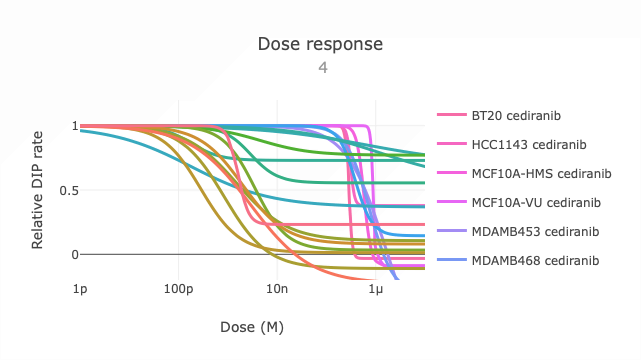

In [11]:
plot_drc(fp)

### Plot DIP rate fit parameters


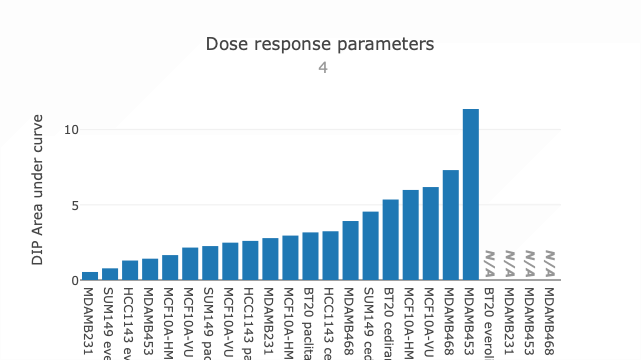

In [12]:
plot_drc_params(fp, 'auc')

### Filtering fit params

The `fp` object is a pandas data frame, so we can filter it before plotting. Some examples:

In [13]:
fit_params_bt20_pac = fp[fp.index.isin(['BT20'], level='cell_line') & \
                         fp.index.isin(['paclitaxel'], level='drug')]

if not IN_COLAB:
    bt20_pac_drc = plot_drc(fit_params_bt20_pac)
    bt20_pac_drc.write_html('drc.html', auto_open=True)

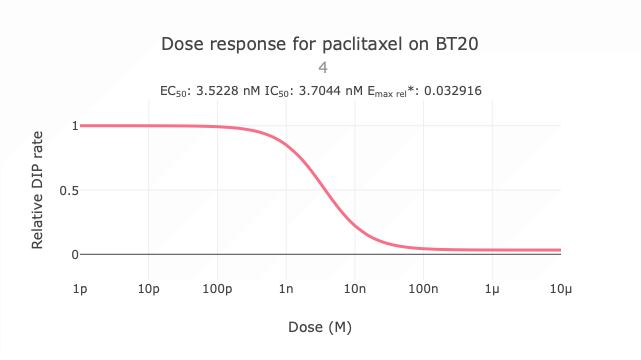

In [14]:
plot_drc(fit_params_bt20_pac)

### Plot time course

Time course plot for paclitaxel on BT20 cells:

In [15]:
if not IN_COLAB:
    tc = plot_time_course(hts007.filter(drugs=['paclitaxel'], cell_lines=['BT20']))
    tc.write_html('time_course.html', auto_open=True)

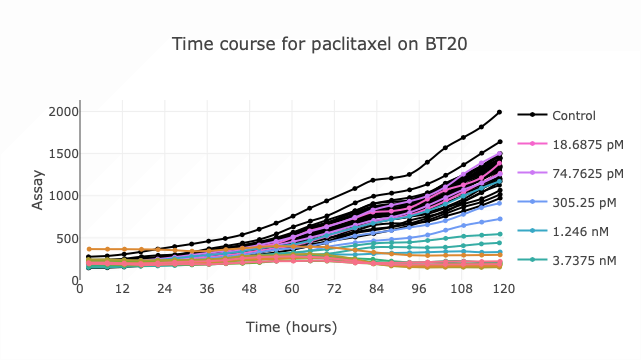

In [16]:
plot_time_course(hts007.filter(drugs=['paclitaxel'], cell_lines=['BT20']))

### Quality control check: plot DIP rate ranges by cell line and plate (box plot)

/Users/darren/miniconda3/envs/thunor/lib/python3.12/site-packages/thunor/plots.py:1648: FutureWarning:

The provided callable <function nanmedian at 0x108446660> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

/Users/darren/miniconda3/envs/thunor/lib/python3.12/site-packages/thunor/plots.py:1650: FutureWarning:

The provided callable <function nanmedian at 0x108446660> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

/Users/darren/miniconda3/envs/thunor/lib/python3.12/site-packages/thunor/plots.py:1669: FutureWarning:

Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.



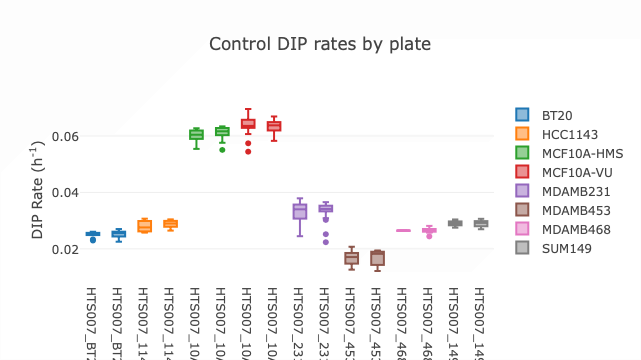

In [17]:
plot_ctrl_dip_by_plate(ctrl_dip_data)